<a href="https://colab.research.google.com/github/bsmrvl/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
# I chose the article about urbanization of states and the election.
# https://fivethirtyeight.com/features/how-urban-or-rural-is-your-state-and-what-does-that-mean-for-the-2020-election/

# Image: https://fivethirtyeight.com/wp-content/uploads/2020/04/rakich-SUNBELT-0409.png?w=1150

##### THIS IS NOT DONE YET! Will re-push to github once I've perfected the graph (and used real data).
##### As always, my lecture code is in the lecture file.

import pandas as pd

# Fake data
fake = pd.DataFrame({'urbanization':[8.4,9,10,11,12,9.4,10.1,11.4, 12.8],'p_margin':[-40,-24,-4,20,30,1,10,40,42]})
fake

,urbanization,p_margin
0,8.4,-40
1,9.0,-24
2,10.0,-4
3,11.0,20
4,12.0,30
5,9.4,1
6,10.1,10
7,11.4,40
8,12.8,42


In [2]:
# Split into Democratic and Republican, so I can plot in two colors

fake_dem = fake[fake['p_margin']>0]
fake_rep = fake[fake['p_margin']<0]

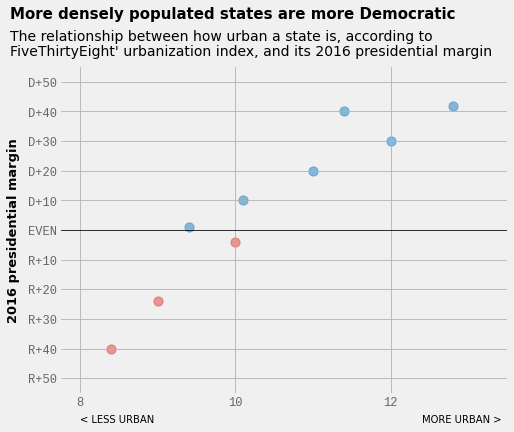

In [39]:
import matplotlib.pyplot as plt
mfont= {'fontname':'Liberation Sans'}
lfont = {'fontname':'Liberation Mono'}

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
fig.set_facecolor('#F0F0F0')
ax.set_facecolor('#F0F0F0')

# Title and Subtitle
ax.set_title('More densely populated states are more Democratic',x=.385,y=1.13, fontsize=15, fontweight='bold')
ax.text(s='The relationship between how urban a state is, according to',x=7.1,y=64, fontsize=14)
ax.text(s='FiveThirtyEight\' urbanization index, and its 2016 presidential margin',x=7.1,y=59, fontsize=14)

# Scatterplot
plt.scatter(fake_dem['urbanization'],fake_dem['p_margin'], color='#3A90CA', alpha=.6, s=85)
plt.scatter(fake_rep['urbanization'],fake_rep['p_margin'], color='#E15850', alpha=.6, s=85)

# Grid and Ticks
ax.grid(True)
ax.set_xticks([8,10,12])
ax.set_xticklabels([8,10,12], color='#666666', fontsize=12, **lfont)
ax.set_yticks([-50,-40,-30,-20,-10,0,10,20,30,40,50])
ax.set_yticklabels(['R+50','R+40','R+30','R+20','R+10','EVEN','D+10','D+20','D+30','D+40','D+50'], color='#666666', fontsize=12, **lfont)

# Axis Labels
ax.set_ylabel('2016 presidential margin', fontsize=13, fontweight='bold', labelpad=8)
ax.text(s='< LESS URBAN',x=8,y=-65)
ax.text(s='MORE URBAN >',x=12.4,y=-65)

# Misc Adjustments
ax.set_xlim(7.75,13.5)
ax.set_ylim(-55,55)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(length=0)
ax.yaxis.get_gridlines()[5].set_color('black')

plt.show()

In [52]:
# Time for real data. FiveThirtyEight didn't have the partisan lean data
# on github, but they had it in a table in the article, so I made my own
# CSV and uploaded it to my fork of the FiveThirtyEight data

urban_state = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/urbanization-index/urbanization-state.csv')
partisan_lean = pd.read_csv('https://raw.githubusercontent.com/bsmrvl/data/master/urbanization-index/partisan_lean.csv')

In [ ]:
# Convert partisan_lean strings to readable integers, negative for
# republican, positive for democratic

def lean_as_number(inst):
  inst = inst.replace('R+','-')
  inst = inst.replace('D+','')
  inst = inst.replace('EVEN','0')
  return int(inst)

partisan_lean['PARTISAN LEAN'] = partisan_lean['PARTISAN LEAN'].apply(lean_as_number)
partisan_lean

In [ ]:
partisan_lean = partisan_lean.rename(columns={'STATE':'state','PARTISAN LEAN':'partisan_lean'})
partisan_lean

In [ ]:
# Merge urbanization and partisan_lean data on each state

lean_w_urban = partisan_lean.merge(urban_state, on='state')
lean_w_urban

In [64]:
# Split into dem and rep, to plot in two colors

real_dem = lean_w_urban[lean_w_urban['partisan_lean']>0]
real_rep = lean_w_urban[lean_w_urban['partisan_lean']<0]

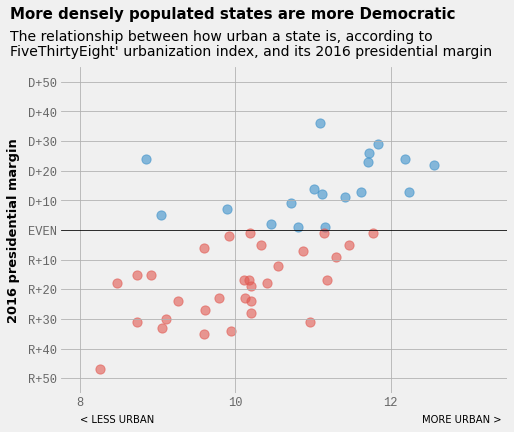

In [66]:
# Redo plot. Nothing changed except data.

import matplotlib.pyplot as plt
mfont= {'fontname':'Liberation Sans'}
lfont = {'fontname':'Liberation Mono'}

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
fig.set_facecolor('#F0F0F0')
ax.set_facecolor('#F0F0F0')

# Title and Subtitle
ax.set_title('More densely populated states are more Democratic',x=.385,y=1.13, fontsize=15, fontweight='bold')
ax.text(s='The relationship between how urban a state is, according to',x=7.1,y=64, fontsize=14)
ax.text(s='FiveThirtyEight\' urbanization index, and its 2016 presidential margin',x=7.1,y=59, fontsize=14)

# Scatterplot
plt.scatter(real_dem['urbanindex'],real_dem['partisan_lean'], color='#3A90CA', alpha=.6, s=85)
plt.scatter(real_rep['urbanindex'],real_rep['partisan_lean'], color='#E15850', alpha=.6, s=85)

# Grid and Ticks
ax.grid(True)
ax.set_xticks([8,10,12])
ax.set_xticklabels([8,10,12], color='#666666', fontsize=12, **lfont)
ax.set_yticks([-50,-40,-30,-20,-10,0,10,20,30,40,50])
ax.set_yticklabels(['R+50','R+40','R+30','R+20','R+10','EVEN','D+10','D+20','D+30','D+40','D+50'], color='#666666', fontsize=12, **lfont)

# Axis Labels
ax.set_ylabel('2016 presidential margin', fontsize=13, fontweight='bold', labelpad=8)
ax.text(s='< LESS URBAN',x=8,y=-65)
ax.text(s='MORE URBAN >',x=12.4,y=-65)

# Misc Adjustments
ax.set_xlim(7.75,13.5)
ax.set_ylim(-55,55)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(length=0)
ax.yaxis.get_gridlines()[5].set_color('black')

plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [4]:
# More Work Here